In [19]:
import json
import requests
import pandas as pd
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pytz


In [45]:
# From openuv 
api_key = "openuv-kdbrloda6ad6-io"

# headers for api call
headers = {
    "x-access-token": api_key,
    "Content-Type": "application/json"
}
# Set necessary variables
lat = 34.11
lng = -117.70
alt = 100
dt = datetime.now()
# Create url with api key above

url = "https://api.openuv.io/api/v1/forecast?lat={}&lng={}&alt={}&dt={}".format(lat,lng,alt,dt)

# # Determine time zone
# from zoneinfo import ZoneInfo
# utc = ZoneInfo('UTC')
# localtz = ZoneInfo('America/Los_Angeles')
# database_time = datetime.utcnow()

# utctime = database_time.replace(tzinfo=utc)
# localtime = utctime.astimezone(localtz)

# Getting the time in Pacific timezone
timezone_LA= pytz.timezone('US/Pacific')
# Getting the time in UTC timezone
timezone_UTC = pytz.timezone("utc")
# input the date time of the newyork in the format Year, Month, Day, Hour, Minute, Second
laDateTime = datetime.now(timezone_LA)
#input date time of the london
utcDateTime = datetime.now(timezone_UTC)

difference = int(laDateTime.strftime('%z'))
difference2 = int(utcDateTime.strftime('%z'))
timeDiff =  (difference2-difference)/100
request = requests.get(url= url, headers=headers)

# Part II: Store data in json file
data = request.json()
#Convert JSON into dataframe
df = pd.json_normalize(data['result'])

#Get rid of extra data
df = df.drop('sun_position.azimuth', axis = 1)
df = df.drop('sun_position.altitude', axis = 1)

#Convert to time index
df['uv_time'] = pd.to_datetime(df['uv_time'], format='ISO8601')
df['Time'] = pd.to_datetime(df['uv_time'])

#Align with time difference
for entry in df['Time'].index:
    value = df['Time'].loc[entry] - timedelta(hours=timeDiff)
    df.at[entry, 'Time'] = value

#Get rid of old formatted time
df = df.drop('uv_time', axis = 1)

#Format time
df['Time'] = df['Time'].dt.strftime('%H')

print(df)

        uv Time
0   0.0000   06
1   0.2247   07
2   0.8785   08
3   1.8694   09
4   2.7683   10
5   3.2688   11
6   3.0952   12
7   2.4516   13
8   1.3790   14
9   0.5720   15
10  0.1022   16


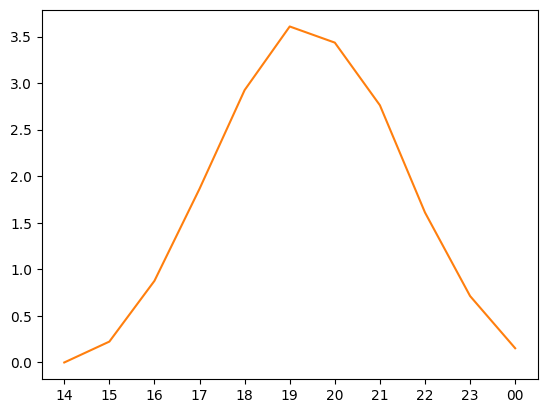

In [10]:
upper = 6.0
lower = 5.0
supper = np.ma.masked_where(df['uv'] < upper, df['uv'])
slower = np.ma.masked_where(df['uv'] > lower, df['uv'])
smiddle = np.ma.masked_where((df['uv'] < lower) | (df['uv'] > upper), df['uv'])
fig, ax = plt.subplots()
ax.plot(df['Time'],smiddle, df['Time'], slower,df['Time'],supper)
plt.show() 
  